In [4]:
import json
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

# Constants remain the same
h = 6.626070e-34  
c = 2.997925e8    
k_B = 1.380649e-23 
q = 1.602176e-19  
e_0 = 8.8541878128e-12

def Blackbody(lambda_i, T):
    return (2*h*c**2) / ((np.exp((h*c)/(k_B*T*lambda_i*1e-6))-1)*lambda_i**5)*1e14

def nb_B(lambda_i, T):
    return (2*c) / ((np.exp((h*c)/(k_B*T*lambda_i*1e-6))-1)*lambda_i**4)*1e8

def IQE(wavelength, e_g):
    lambda_g = np.ceil(1240 / e_g) / 1000.0
    if (lambda_g > wavelength[-1]):
        l_index = len(wavelength) - 1
    else:
        l_index = np.where(wavelength >= lambda_g)[0][0]
    IQE = np.ones(len(wavelength))
    IQE[l_index:] = 0
    return IQE

def JV(em, IQE, lambda_i, T_PV=300):
    J_L = q * np.sum(em * nb_B(lambda_i, 2073.15) * IQE) * (lambda_i[1] - lambda_i[0])
    J_0 = q * np.sum(nb_B(lambda_i, T_PV) * IQE) * (lambda_i[1] - lambda_i[0])

    V_oc = (k_B * T_PV / q) * np.log(J_L / J_0 + 1)
    t = np.linspace(0, 1, 100)
    V = t * V_oc

    J = J_L - J_0 * (np.exp(q * V / (k_B * T_PV)) - 1)
    P = V * J

    return J_L, J_0, V_oc, np.max(P)

def power_ratio(lambda_i, emissivity, T_emitter, E_g_PV=0.726, T_PV=300):
    P_emit = np.sum(emissivity * Blackbody(lambda_i, T_emitter)) * (lambda_i[1] - lambda_i[0])
    IQE_PV = IQE(lambda_i, E_g_PV)
    J_L, J_0, V_oc, P_max = JV(emissivity, IQE_PV, lambda_i, T_PV)
    FOM = J_L / P_emit
    return FOM, J_L, P_emit, J_0, V_oc, P_max

# New function to find latest iteration for a given image
def get_latest_iteration(log_dir, image_index):
    files = os.listdir(log_dir)
    iterations = [int(f.split('.')[1]) for f in files 
                 if f.startswith(f"{image_index}.") and f.endswith('.npy')]
    return max(iterations) if iterations else None

# Load from logs
base_log_dir = os.path.join('..', 'logs')

# Rest of the analysis code remains the same
wavelengths = np.linspace(0.350, 3.0, 2651)
wavelengths = wavelengths[(wavelengths != 0.5) & (wavelengths != 1.0)]
T_e = 2073.15  # K
T_PV = 300     # K
E_g_PV = 0.726 # eV


# Create plots
nb_B_e = nb_B(wavelengths, T_e)
IQE_PV = IQE(wavelengths, E_g_PV)



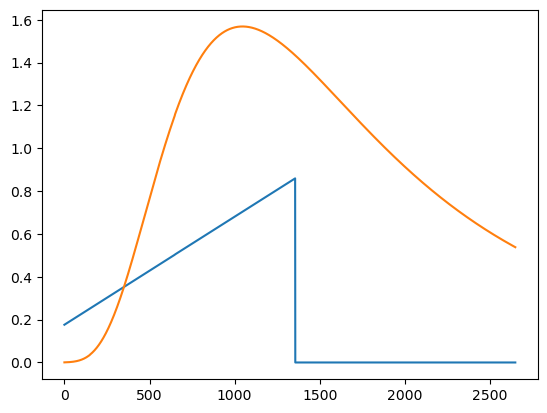

In [11]:
IQE_PV = IQE(wavelengths, .726)
plt.plot(nb_B(wavelengths, 2073.15) * IQE_PV/1e14/(Blackbody(wavelengths, 2073.15)*1e5))
# plt.show()
plt.plot(Blackbody(wavelengths, 2073.15)*1e5)
plt.show()